## Midterm 1 (Practice)

This exam has three questions. The first problem has several True/False questions, covering various concepts we've covered so far. The next two problems ask you to implement different models on some small data sets, and to answer questions about the results.

You can use any online resource: This intended to allow to you access documentation and examples for coding as you would when you program in practice. *You are expressly forbidden to have any communication with another person--either inside or outside of the class--during the exam.*

You have 1 hour and 15 minutes to complete the exam. When you are finished, upload to Canvas your notebook and pdf (from html) printout, just as you do for the assignments. 



### Problem 1: True/False (15 points)

Indicate your answer for each question by replacing [TF] with [T] for True and replacing [TF] with [F] for False.

#### 1.1 Classification
Consider a classification task where the input is $d$-dimensional and the output $Y$ is binary

1. [TF] A discriminative model assigns a probability to both the input $x$ and the response $y$.

1. *[TF] Linear discriminant analysis is a generative classification model.*

1. *[TF] A generative model always gives a linear decision boundary. *

1. *[TF] If $X$ has a Gaussian distribution conditioned on $Y$, then the Bayes decision boundary for $Y$ given $X$ is linear. *

1. *[TF] The optimal classifier, or Bayes rule, can be derived from a generative model.*

#### 1.2 Trees and random forests

Consider growing random forests for regression. We can vary the depth (or “height”) $h$ of the tree or the number of random predictors $m$ chosen for each split.


6. [TF] As the depth $h$ of the tree increases, the training error decreases.

6. [TF] As the depth $h$ of the tree increases, the test error decreases. 

6. [TF] As the sampled predictors $m$ increases, the training error increases.

6. [TF] As the sampled predictors $m$ increases, the test error generally decreases. 

6. [TF] The trees in a random forest model can be grown in parallel, independent of each other.


#### 1.3 Bias, variance and complexity


11. [TF] As model complexity increases, squared bias decreases.

11. [TF] As model complexity increases, the variance of a model decreases.

11. [TF] As model complexity increases, the training error decreases.

11. [TF] As model complexity increases, the test error decreases.

11. [TF] As the size of the training data increases, the model complexity increases.



### Problem 2: Decision trees (20 points)

How well can you determine the species of iris flowers using only two the width of the petal and sepal? You'll subset Fisher's iris data in this problem and build a classification tree to find out.

We'll first import some libraries and process the data.


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

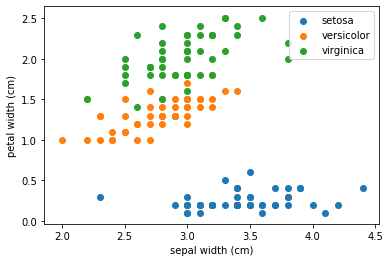

In [85]:
from sklearn.datasets import load_iris

fig = plt.figure()
iris = load_iris()
x_index = 1
y_index = 3
ax = fig.add_subplot(111)
for c in np.arange(3):
    mask = (iris.target==c)
    plt.scatter(iris.data[mask, x_index], iris.data[mask, y_index], label=iris.target_names[c])

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper right')
plt.show()

Finally we have our processed data `X` and response values `y`:

In [98]:
X = iris.data[:, (x_index, y_index)] # between two indices
y = iris.target # setosa', 'versicolor', 'virginica === 0, 1, 2

In [99]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Next, you should construct a series of decision tree classifiers with an increasing number of training points. Specifically:

* let the sample size vary from 10% of the data to 90% of the data, in increments of 10%
* for each sample size, train a decision tree on randomly selected training points, and test on the remaining data
* For each sample size, run 3000 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

Some important notes and hints:

* Use the function `sklearn.model_selection.train_test_split` in each trial to randomly split the data into training and test sets. For example, you can use `train_test_split(X, y, train_size=.1)`
* The implementation only requires about 10-15 lines of code. If you find yourself writing a lot more, reconsider your approach!

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
trials = 3000
train_percent = np.linspace(.1,.9,num=9)
error_rate = []
dtree = DecisionTreeClassifier()

In [102]:
# your code here
for p in train_percent:
    local_error = []
    for _ in range(trials):
        dtree = DecisionTreeClassifier()
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)
        local_error.append(1 - accuracy_score(y_test, y_pred))
    error_rate.append(np.mean(local_error))

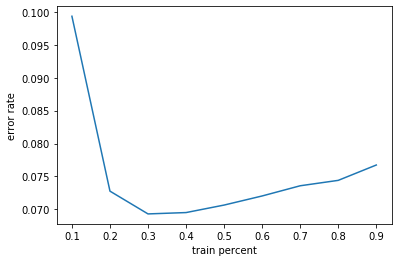

In [103]:
plt.plot(train_percent, error_rate)
plt.ylabel('error rate')
_ = plt.xlabel('train percent')

Explain the qualitative shape of your error curve above. Specifically, if it is "U-shaped" or monotonically decreasing or increasing, explain why. What might be changed, if anything, so that the error is decreasing with the amount of training data used?

[Your answer in markdown here]

### Problem 3: Principal components analysis (20 points)

<img src="./UK.png" width="250" align="top">

In this problem you will carry out principal components analysis of a small data set of food consumption in the United Kingdom. The data are the consumption in grams per person, per week of 17 different types of food, collected in the four countries of the United Kingdom in 1997.

We first load in some packages, and then process the data.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [105]:
data = pd.read_csv('UK_foods.csv')
data

,Category,England,Wales,Scotland,Northern Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


In [106]:
foods = data['Category'].values
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']
X = data.drop('Category', 1).values.T

In [108]:
foods

array(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype=object)

In [107]:
X

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

Now run PCA on the data matrix X. Call the appropriate functions 

In [126]:
pca = PCA(n_components=2)
pca.fit_transform(X)

# your code here

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [127]:
pca.components_

array([[-0.05695538,  0.04792763, -0.25891666, -0.08441498, -0.00519362,
        -0.03762098,  0.40140206, -0.15184994, -0.24359373, -0.02688623,
        -0.03648827, -0.6326409 , -0.04770286, -0.02618776,  0.23224414,
        -0.46396817, -0.0296502 ],
       [ 0.01601285,  0.01391582, -0.01533114, -0.05075495, -0.09538866,
        -0.0430217 , -0.71501708, -0.14490027, -0.22545092,  0.04285076,
        -0.0454518 , -0.17774074, -0.21259968, -0.03056054,  0.55512431,
         0.11353652,  0.00594992]])

In [120]:
principal_vectors = pca.components_ # fill in appropriately
principal_components = pca.components_ # fill in appropriately

The following code prints the first two principal vectors. We filled these in with random Gaussians -- you should remove that line so that the correct principal vectors are displayed.

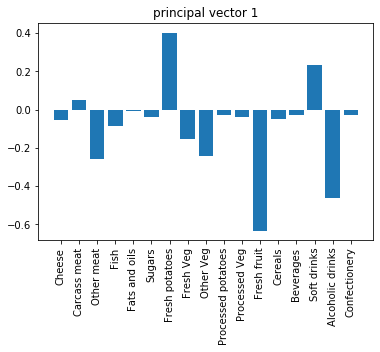

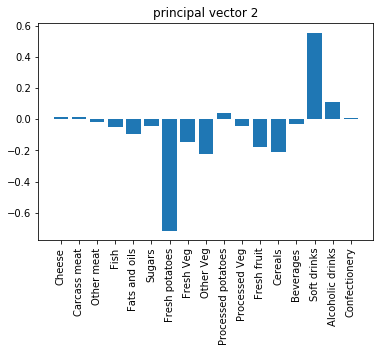

In [125]:
for i in np.arange(2):
    pv = principal_vectors[i]  # uncomment this line!
    # pv = np.random.normal(size=X.shape[1]) # remove this line!
    plt.bar(np.arange(17), pv)
    plt.xticks(np.arange(17), foods, rotation='vertical')
    plt.title('principal vector %d' % (i+1))
    plt.show()


Describe qualitatively the main properties of the data that the first two principal vectors are capturing.

[Your answer here in markdown]

Finally, plot the projections of the four countries onto the first two principal components of the data.
To do this, use the code provided below, and just swap in the `principal_components` you computed above.

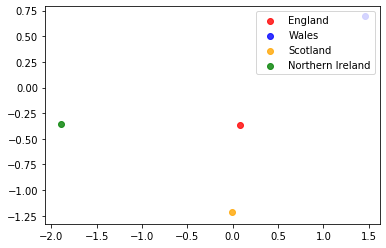

In [10]:
fig = plt.figure()
# pcs = _ # put appropriate code here to give the first two principal components for each of the four countries
pcs = np.matrix(np.random.normal(size=8)).reshape(4,2) # remove this line!
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'orange', 'green']
for i in np.arange(4):
    ax.scatter(pcs[i,0], pcs[i,1], alpha=0.8, c=colors[i], label=countries[i])
plt.legend(loc='upper right')
plt.show()

Describe qualitatively what this plot says about the food consumption patterns of 
the four parts of the UK. Your description should discuss both aspects of the original data and of the two principal vectors plotted above.


[Your answer in markdown here]